In [1]:
import numpy as np
import pandas as pd
from library import portfolio

Importing MATLAB


In [138]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [136]:
def efficientFrontier( alloc, stockPool, stocks, vol, ti, tf):
    """
    remake of sharpe calculation following 
    https://www.mlq.ai/python-for-finance-portfolio-optimization/#h1sjvcte25p1r8or1e1ngd82h2r8ha1
    uses allocation percentage instead of weights
    """
    #print(np.shape(stockPool))

    # if np.sum(alloc[:-1])==0:
    #     print("all cash")
    #     return 0
    # else:
    Rp = 0
    var = 0
    Rf = 0.010 * alloc[-1] # cash return
    for i,j in enumerate(stocks): 
        stepReturn = 100*np.diff(stockPool[j][ti:tf])/stockPool[j][ti:tf-1]
        Rp += alloc[i]*np.mean(stepReturn)
        var += alloc[i]*alloc[i]*np.var(stepReturn)
    stdp = np.sqrt(var)
#     print(Rp , stdp)
    return Rp, stdp, (Rp-Rf)/stdp

def sharpe( alloc, stockPool, stocks, vol, ti, tf):
    """
    remake of sharpe calculation following 
    https://www.mlq.ai/python-for-finance-portfolio-optimization/#h1sjvcte25p1r8or1e1ngd82h2r8ha1
    uses allocation percentage instead of weights
    """
    #print(np.shape(stockPool))

    # if np.sum(alloc[:-1])==0:
    #     print("all cash")
    #     return 0
    # else:
    Rp = 0
    var = 0
    Rf = 0.010 * alloc[-1] # cash return
    for i,j in enumerate(stocks): 
        stepReturn = 100*np.diff(stockPool[j][ti:tf])/stockPool[j][ti:tf-1]
        Rp += alloc[i]*np.mean(stepReturn)
        var += alloc[i]*alloc[i]*np.var(stepReturn)
    stdp = np.sqrt(var)
#     print(Rp , stdp)
    return -(Rp-Rf)/stdp

In [77]:
portf = portfolio.portfolio('portf', 4, 100000, [1,6,7,15])

In [11]:
stockPool = np.loadtxt('./fbm/fbm100_2_14_2_5.txt')

In [78]:
a, b, c = efficientFrontier(list(portf.alloc.values()),stockPool, portf.stocks, portf.volume, 2400, 2900)

In [84]:
b

1471.1499744104356

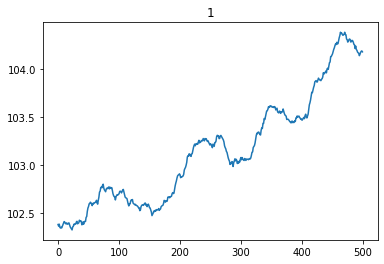

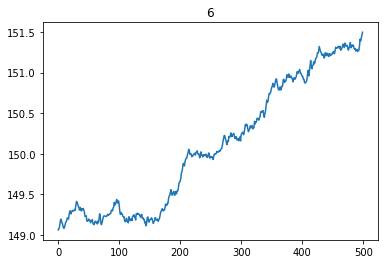

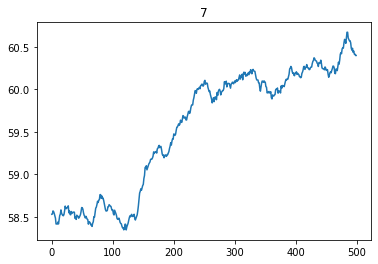

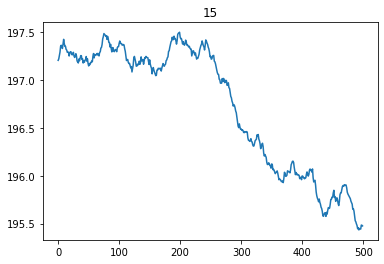

In [122]:
for i in portf.stocks:
    plt.plot(np.arange(500), stockPool[i][2400:2900])
    plt.title(str(i))
    plt.show()

In [20]:
a = np.random.random(6)
a /= a.sum()

In [148]:
returns = np.array([])
stdps = np.array([])
sharpes = np.array([])
for i in range(5000):
    alloc = np.random.random(5)
    alloc /= alloc.sum()
    r, s, c = efficientFrontier(alloc,stockPool, portf.stocks, portf.volume, 2400, 2900)
    returns = np.append(returns, r)
    stdps = np.append(stdps, s)
    sharpes = np.append(sharpes, c)
    

In [149]:
def check_sum(alloc):
    return np.sum(alloc)-1
cons = ({'type':'eq','fun':check_sum})

bounds = []
for i in range(len(portf.stocks)+1):
    bounds.append((0,1))

opt= (minimize(sharpe, 
              list(portf.alloc.values()), 
              args=(stockPool,portf.stocks,portf.volume,2400,2900), 
              method='SLSQP', 
              bounds=bounds,
              constraints=cons)['x'])

In [150]:
r, s, c = efficientFrontier(opt, stockPool, portf.stocks, portf.volume, 2400, 2900)

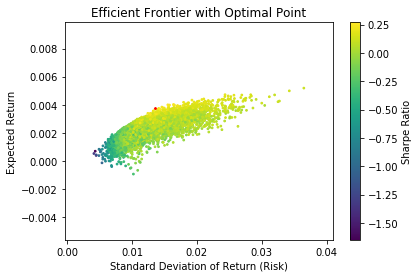

In [157]:
plt.scatter(stdps, returns, c = (sharpes), s = 3)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(s,r, c = 'red', s = 3)
plt.xlabel("Standard Deviation of Return (Risk)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier with Optimal Point")
# plt.grid(True)
plt.savefig("efficientfrontier.png",bbox_inches='tight', dpi=250)

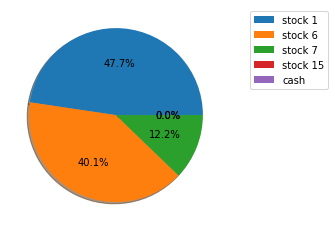

In [183]:
plt.pie(opt, labels=['stock 1', 'stock 6', 'stock 7', 'stock 15', 'cash'], shadow=True, labeldistance=None, autopct = '%1.1f%%')
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))


In [176]:
def stockCov(portf,TstockPool):
    """
    """
#     tmax = 2900#portf.valuedata.time.max()+1
#     tmin = 2400#portf.valuedata.time.min()
    stocks = portf.stocks
    labels = [str(i) for i in stocks]
    print(labels)
    cov = np.corrcoef(TstockPool[stocks])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cov, interpolation='nearest')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(stocks)))
    ax.set_yticks(np.arange(len(stocks)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_title("Portf ID: " + str(portf.portfID) +" | Pearson Correlation Coefficient", pad=10)

['1', '6', '7', '15']


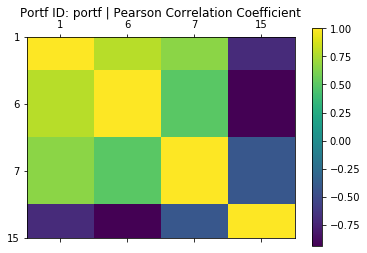

In [184]:
stockCov(portf, stockPool)

In [182]:
opt

array([4.76502094e-01, 4.01459337e-01, 1.22038569e-01, 0.00000000e+00,
       1.48752538e-16])